In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data_num_col = train_data.select_dtypes(exclude=['object']).columns
train_data_num = train_data[train_data_num_col]

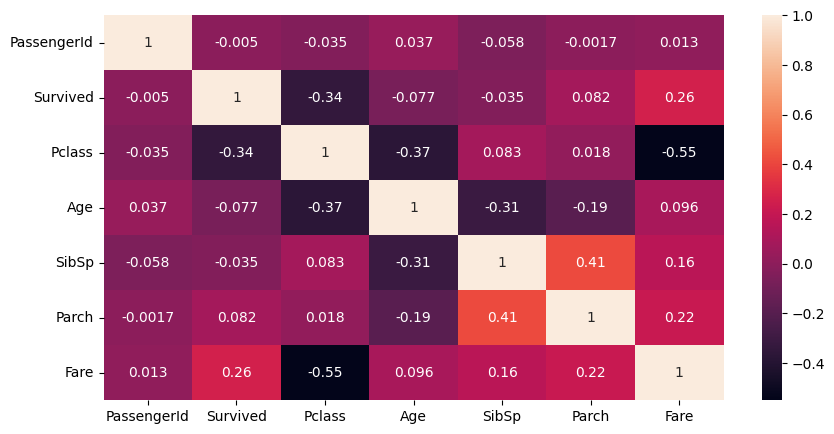

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True);

In [10]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


<Axes: >

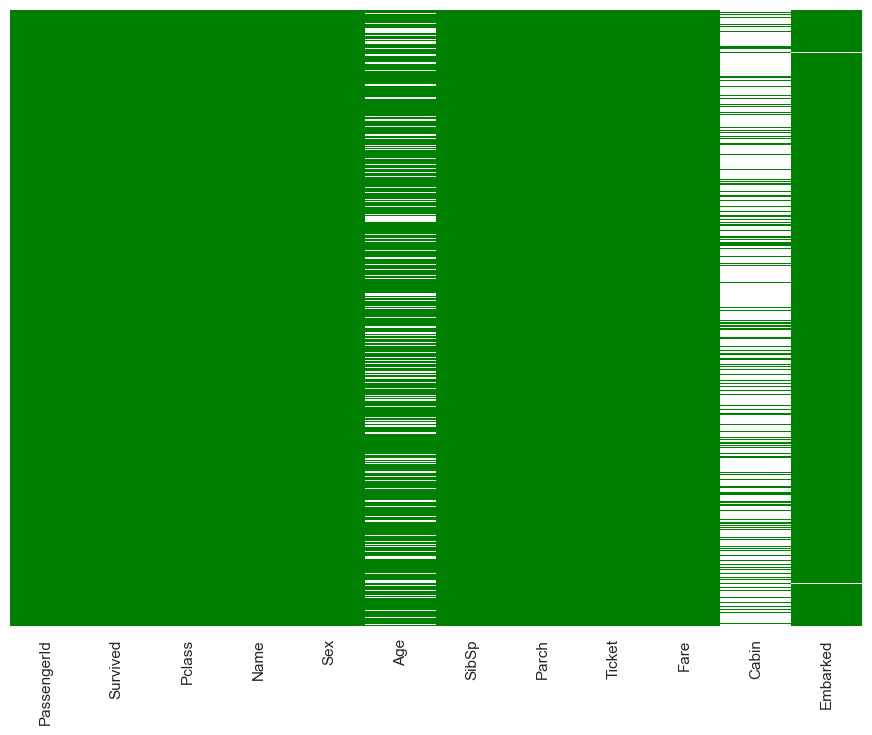

In [11]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="ocean")

In [12]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

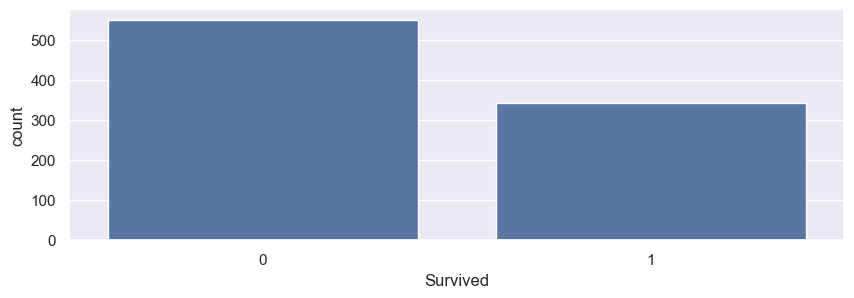

In [15]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=train_data)
plt.show()

<Figure size 1000x300 with 0 Axes>

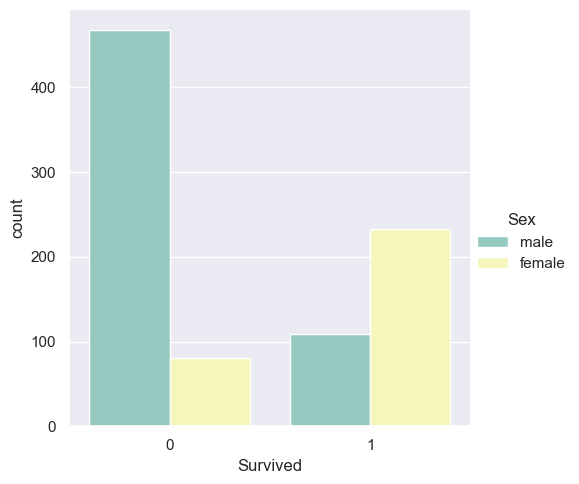

In [16]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', hue='Sex', kind='count', data=train_data,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

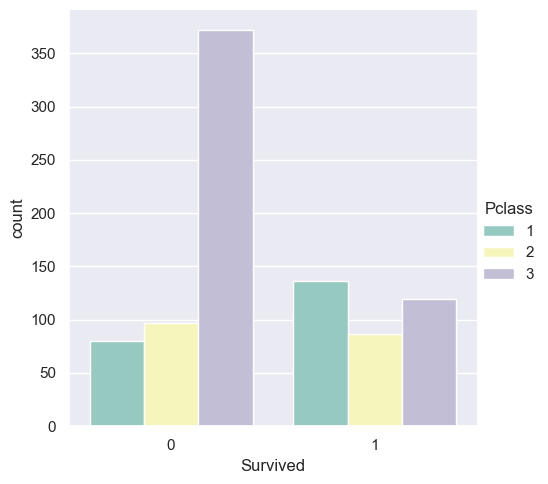

In [17]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', hue='Pclass', kind='count', data=train_data,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

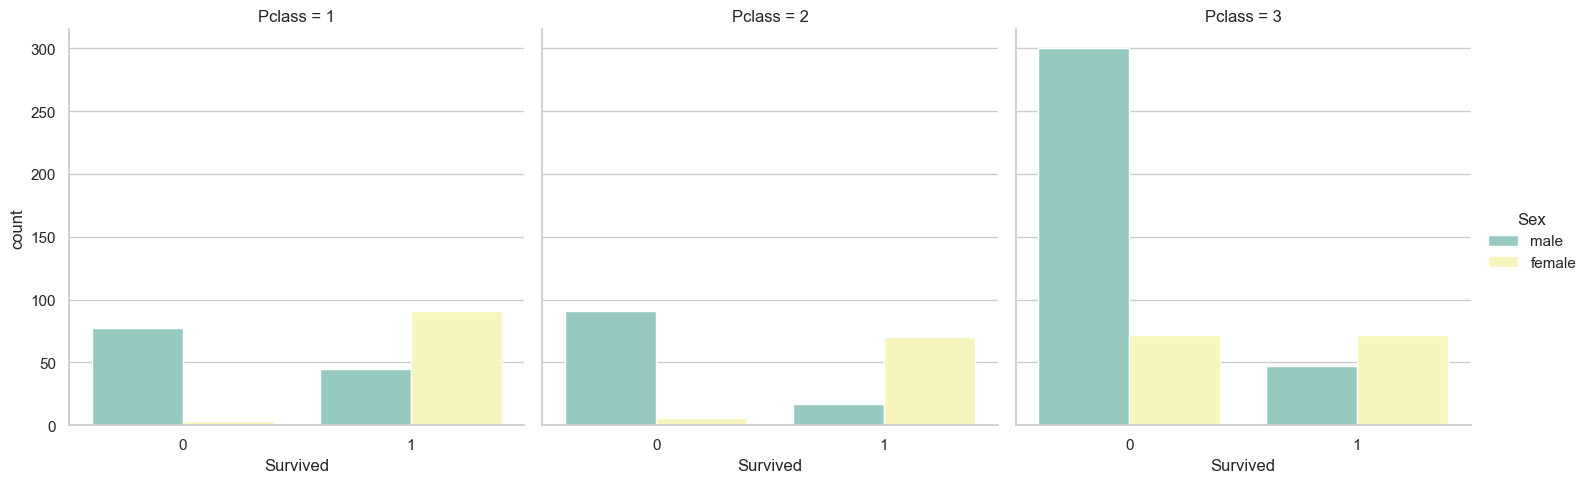

In [18]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_data,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

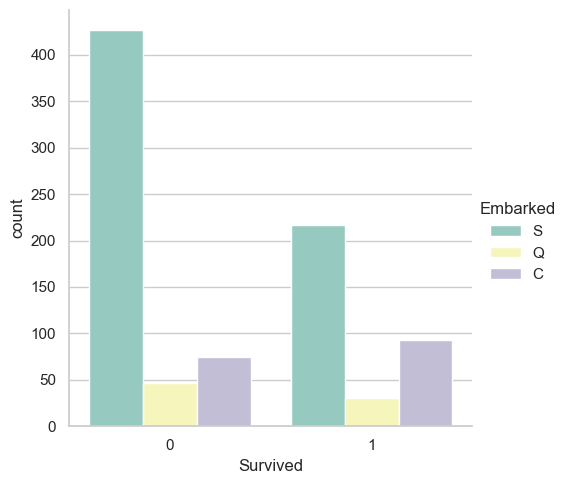

In [19]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', hue='Embarked', kind='count', data=train_data,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

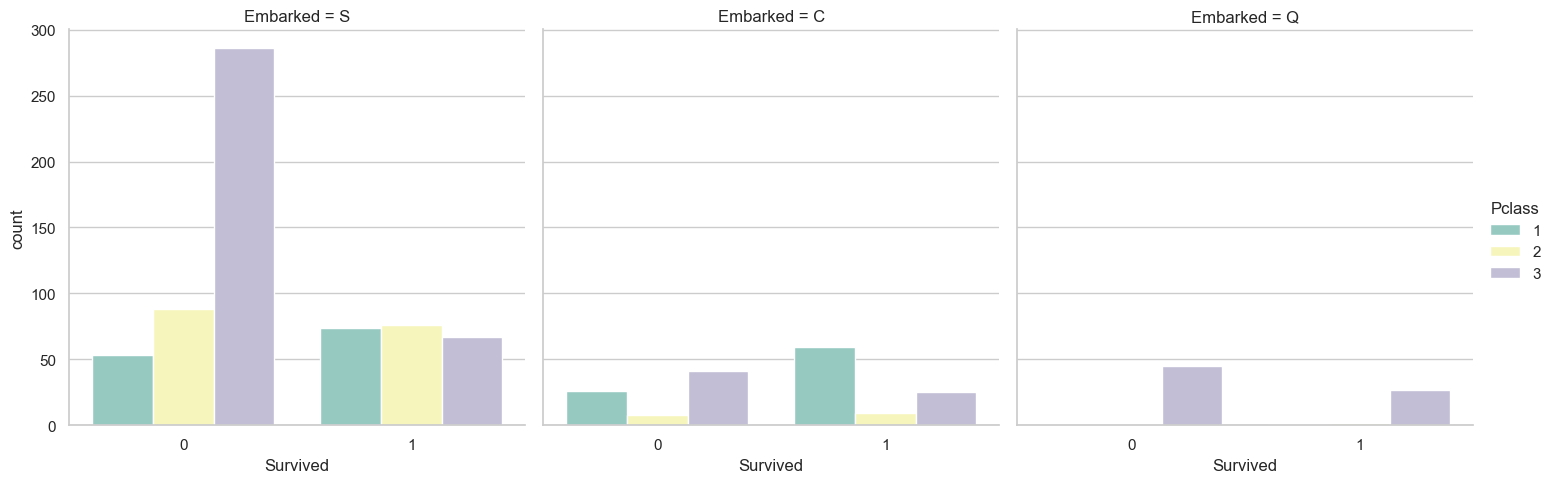

In [20]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=train_data,palette="Set3");
plt.show()

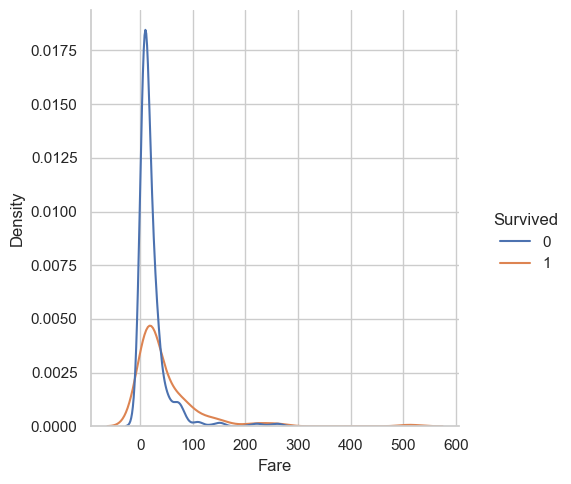

In [21]:
sns.displot(data=train_data, x="Fare",hue='Survived',kind ='kde')

In [22]:
pd.crosstab(train_data.Sex,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [23]:
pd.crosstab(train_data.Pclass,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [24]:
pd.crosstab(train_data.Embarked,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel1')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<Axes: xlabel='Age', ylabel='Count'>

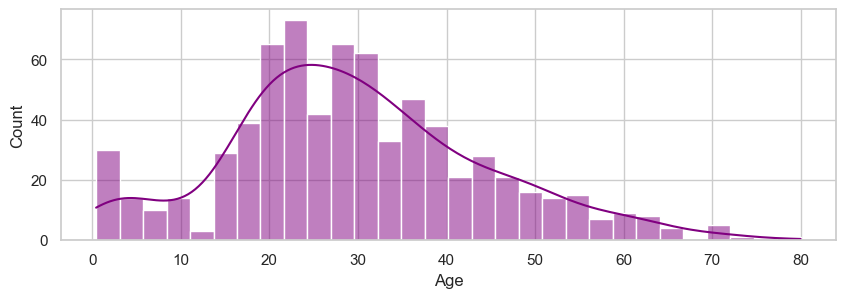

In [25]:
plt.figure(figsize=(10, 3))
sns.histplot(train_data['Age'].dropna(),kde=True,color='purple',bins=30)

<Axes: ylabel='Frequency'>

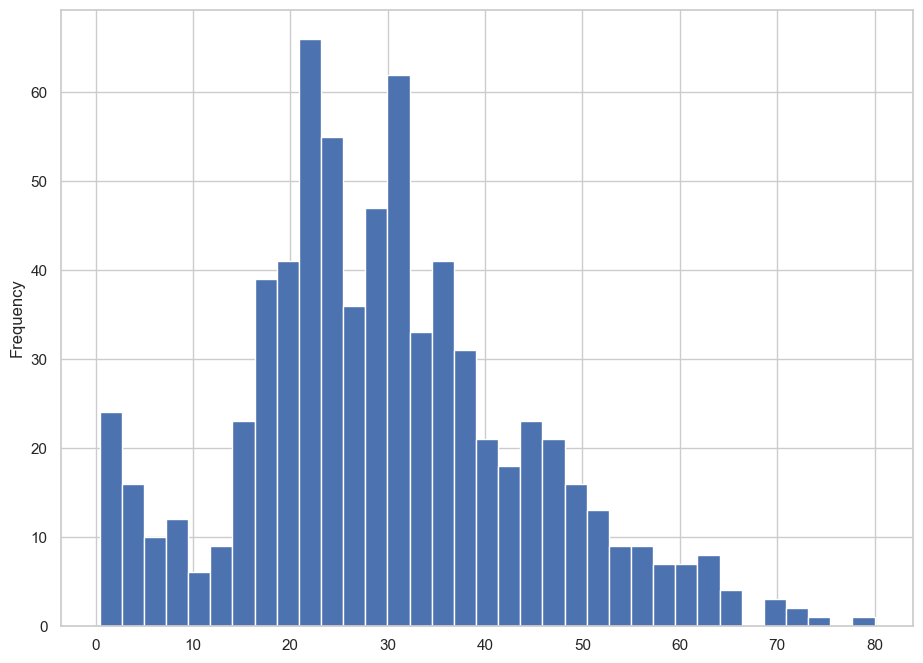

In [26]:
train_data['Age'].plot(kind='hist',bins=35)

<Axes: xlabel='SibSp', ylabel='count'>

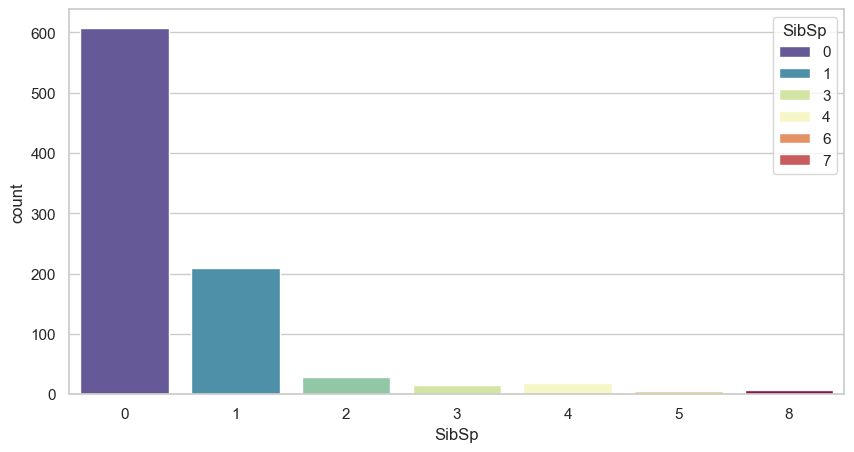

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',hue='SibSp',data=train_data, palette='Spectral_r')

<Axes: xlabel='Parch', ylabel='count'>

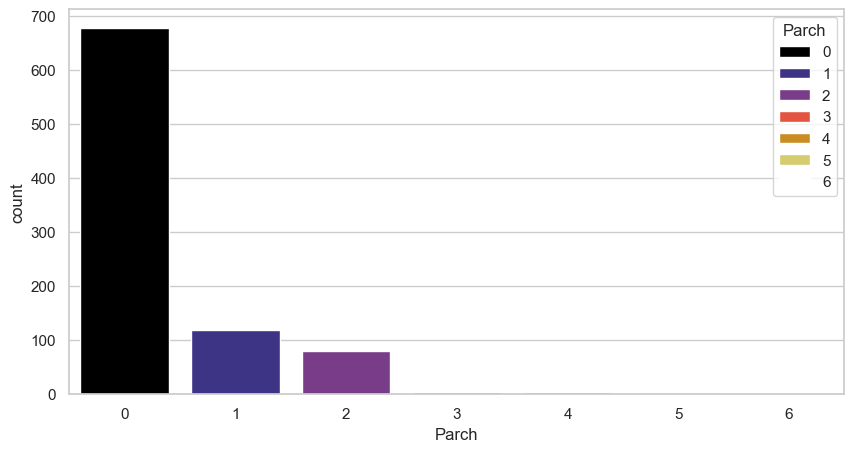

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',hue='Parch',data=train_data,palette='CMRmap')

In [29]:
train_data['Age'].isnull().sum()

177

Text(0.5, 1.0, 'Age over Pclass')

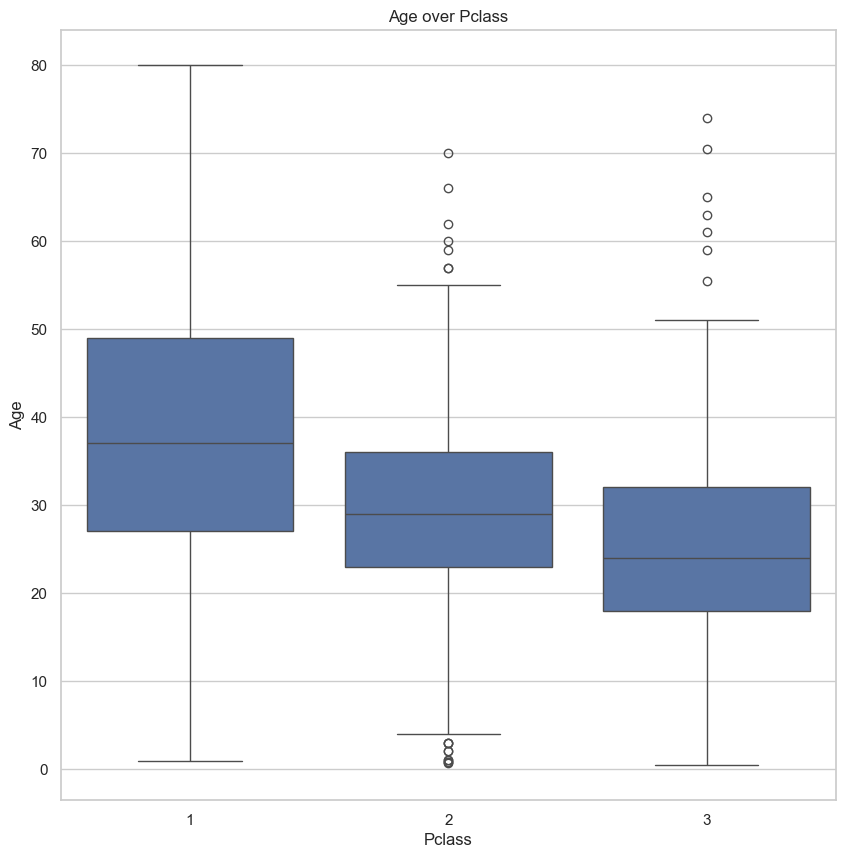

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=train_data)
plt.title('Age over Pclass')

In [39]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [40]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_train_age,axis=1)

C:\Users\IT\AppData\Local\Temp\ipykernel_11084\3981110378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\IT\AppData\Local\Temp\ipykernel_11084\3981110378.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [41]:
train_data['Age'].isnull().sum()

0

In [42]:
train_data['Cabin'].isnull().sum()

687

In [43]:
train_data.drop('Cabin',axis=1,inplace=True)

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [46]:
train_data.dropna(inplace=True)

In [47]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [48]:
train_data = pd.get_dummies(train_data, columns = ['Sex'], drop_first=True)
train_data = pd.get_dummies(train_data, columns = ['Embarked'], drop_first=True)

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [50]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [51]:
X = train_data.drop(['Survived'],axis = 1)
y = train_data['Survived']

In [52]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 44.3 KB


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [56]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [57]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [58]:
y_pred = LogisticRegression_model.predict(X_test)

In [59]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [60]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[98,  9],
       [24, 47]], dtype=int64)

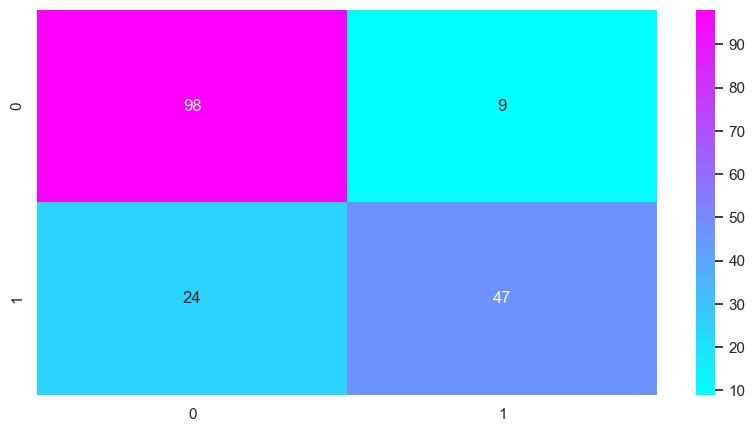

In [61]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()

In [62]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.8146067415730337
Recall of Logistic Regression model is    :  0.6619718309859155
Precision of Logistic Regression model is :  0.8392857142857143


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [64]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\IT\AppData\Local\Temp\ipykernel_11084\3978569677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=test_data,palette='pink_r')


Text(0.5, 1.0, 'Age over Pclass')

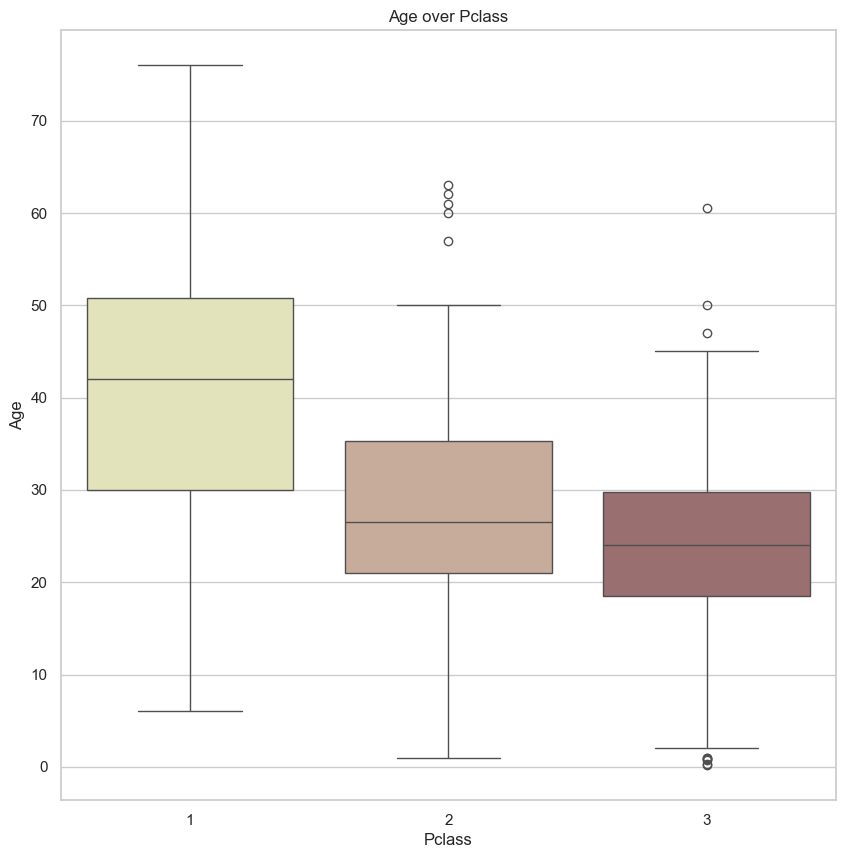

In [65]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=test_data,palette='pink_r')
plt.title('Age over Pclass')

In [66]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [67]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_test_age,axis=1)

C:\Users\IT\AppData\Local\Temp\ipykernel_11084\3601112268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\IT\AppData\Local\Temp\ipykernel_11084\3601112268.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [68]:
test_data['Age'].isnull().sum()

0

In [69]:
test_data.drop('Cabin',axis=1,inplace=True)

In [71]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [72]:
null_columns=test_data.columns[test_data.isnull().any()]
row_num = (test_data[test_data["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [73]:
test_data.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object

<Axes: xlabel='Fare', ylabel='Count'>

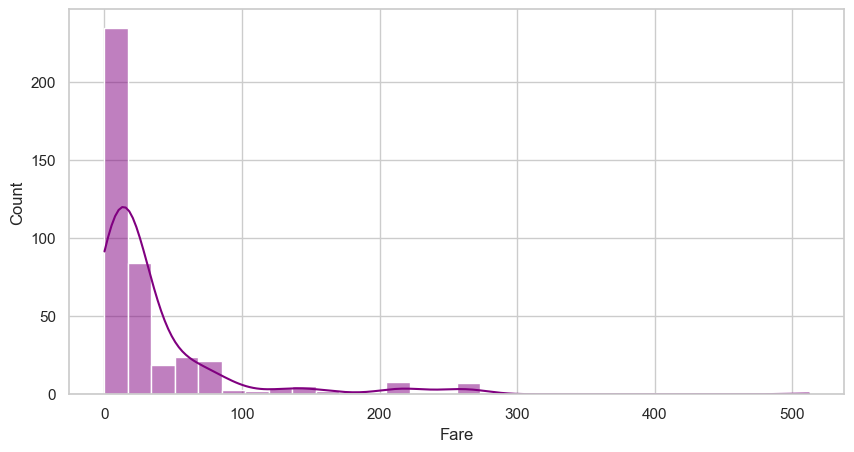

In [74]:
plt.figure(figsize=(10, 5))
sns.histplot(test_data['Fare'].dropna(),kde=True,color='purple',bins=30)

In [75]:
Fare_median = test_data["Fare"].median()
Fare_median

14.4542

In [76]:
test_data = test_data.replace(np.NaN,14.4542)

In [77]:
test_data.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      14.4542
Embarked                        S
Name: 152, dtype: object

In [78]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
test_pass = test_data['PassengerId']
test_pass

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [80]:
test_data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [81]:
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'], drop_first=True)

In [82]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [83]:
X1_Train = train_data.drop(['Survived'],axis = 1)
y1_Train = train_data['Survived']

In [84]:
cols = test_data.columns

scal = RobustScaler()

X1_Train = scal.fit_transform(X1_Train)
test_data = scal.transform(test_data)

In [85]:
X1_Train = pd.DataFrame(X1_Train,columns=cols)
test_data = pd.DataFrame(test_data,columns=cols)

In [86]:
X1_Train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,-0.275862,1.0,0.0,-0.311813,0.0,0.0,0.0
1,-2.0,0.827586,1.0,0.0,2.459687,-1.0,0.0,-1.0
2,0.0,0.000000,0.0,0.0,-0.282598,-1.0,0.0,0.0
3,-2.0,0.620690,1.0,0.0,1.672674,-1.0,0.0,0.0
4,0.0,0.620690,0.0,0.0,-0.277188,0.0,0.0,0.0


In [87]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.586207,0.0,0.0,-0.286744,0.0,1.0,-1.0
1,0.0,1.448276,1.0,0.0,-0.322634,-1.0,0.0,0.0
2,-1.0,2.482759,0.0,0.0,-0.206313,0.0,1.0,-1.0
3,0.0,0.068966,0.0,0.0,-0.250677,0.0,0.0,0.0
4,0.0,-0.275862,1.0,1.0,-0.093779,-1.0,0.0,0.0


In [88]:
LogisticRegression_model.fit(X1_Train,y1_Train)

LogisticRegression(max_iter=4000)

In [89]:
y_pred_2 = LogisticRegression_model.predict(test_data)

In [90]:
y_pred_2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [91]:
submission = pd.DataFrame({'PassengerId': test_pass, 'Survived': y_pred_2})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
